In [1]:
from src.models.model_components.preprocessor import SignalPreprocessor

In [2]:
from src.data.data_helper import get_raw_data_as_dataframe, segment_data

raw_train, raw_val = get_raw_data_as_dataframe(validation_subjects=(1, 2))

In [47]:
print(raw_train.head())

     time  measurement  label  \
0  0.0000     1.661916      0   
1  0.0002     1.658237      0   
2  0.0004     1.661916      0   
3  0.0006     1.661916      0   
4  0.0008     1.661916      0   

                                              source  
0  C:\Users\erik\IES_codebase\EMG_Project\CDT406-...  
1  C:\Users\erik\IES_codebase\EMG_Project\CDT406-...  
2  C:\Users\erik\IES_codebase\EMG_Project\CDT406-...  
3  C:\Users\erik\IES_codebase\EMG_Project\CDT406-...  
4  C:\Users\erik\IES_codebase\EMG_Project\CDT406-...  


In [6]:
pre_processor_1 = SignalPreprocessor(pre_processor_variant = 1,
                                       low_freq=20.0,
                                       high_freq=500.0,
                                       fs=5000.0,
                                       order=7)

pre_processor_1.calibrate(raw_train)

In [7]:
pre_processor_2 = SignalPreprocessor(pre_processor_variant = 2,
                                       low_freq=20.0,
                                       high_freq=500.0,
                                       fs=5000.0,
                                       order=7)
pre_processor_2.calibrate(raw_train)

In [8]:
pre_processor_3 = SignalPreprocessor(pre_processor_variant = 3,
                                       low_freq=20.0,
                                       high_freq=500.0,
                                       fs=5000.0,
                                       order=7)
pre_processor_3.calibrate(raw_train)

In [48]:
def get_measurements_by_file_index(df, index):
    # Get the unique sources in order of appearance
    unique_sources = df['source'].unique()

    # Check if index is valid
    if index < 0 or index >= len(unique_sources):
        raise IndexError("Index out of range of unique sources.")

    # Get the source file corresponding to the index
    target_source = unique_sources[index]

    # Filter the dataframe for rows matching this source
    filtered_df = df[df['source'] == target_source]

    # Return the measurement values as a Series or list
    return filtered_df['measurement'].values

In [49]:
single_signal = get_measurements_by_file_index(raw_train, 0)

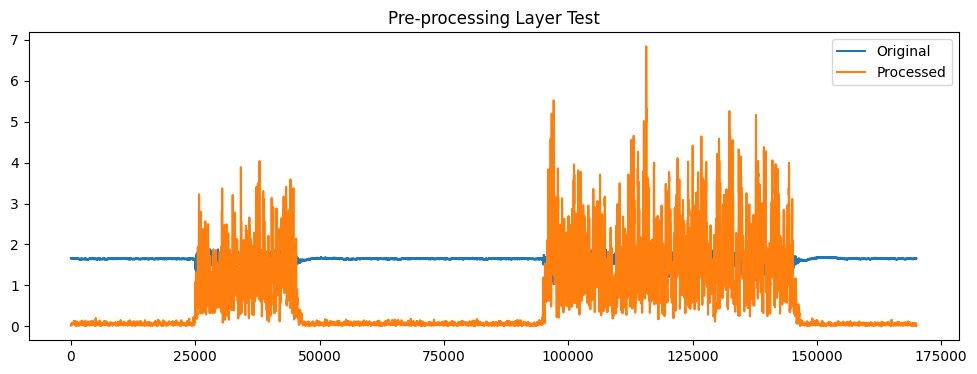

In [52]:
import matplotlib.pyplot as plt

processed_signal = pre_processor_1.pre_process(single_signal)

# Plot original vs processed
plt.figure(figsize=(12, 4))
plt.plot(single_signal, label='Original')
plt.plot(processed_signal, label='Processed')
plt.legend()
plt.title('Pre-processing Layer Test')
plt.show()

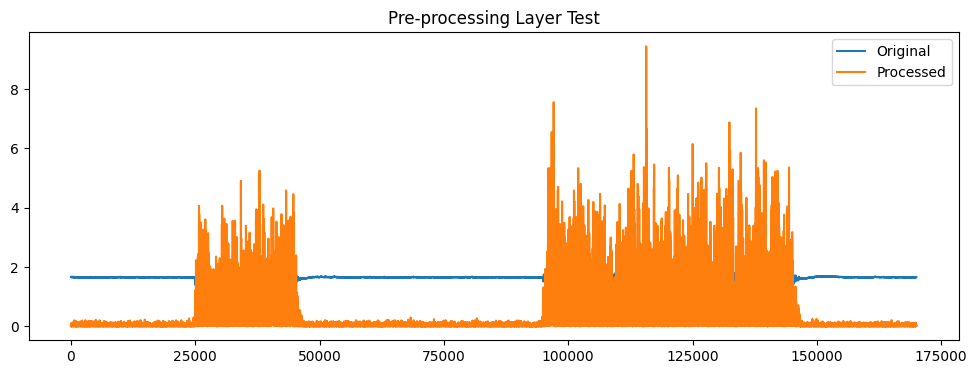

In [53]:
import matplotlib.pyplot as plt

processed_signal = pre_processor_2.pre_process(single_signal)

# Plot original vs processed
plt.figure(figsize=(12, 4))
plt.plot(single_signal, label='Original')
plt.plot(processed_signal, label='Processed')
plt.legend()
plt.title('Pre-processing Layer Test')
plt.show()

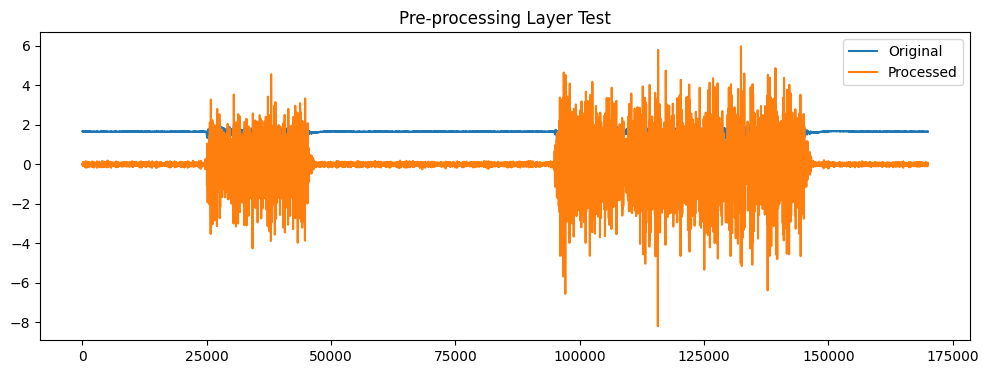

In [54]:
import matplotlib.pyplot as plt

processed_signal = pre_processor_3.pre_process(single_signal)

# Plot original vs processed
plt.figure(figsize=(12, 4))
plt.plot(single_signal, label='Original')
plt.plot(processed_signal, label='Processed')
plt.legend()
plt.title('Pre-processing Layer Test')
plt.show()